In [1]:
import dos
from IPython.display import Image
path = './dos/BendingModes_Interface'
#`path = './dos/trivial_AcO/'

INFO:DOS:Reading config from ./dos/BendingModes_Interface/dos.yaml
INFO:DOS:New driver: M1
INFO:M1:New input: Txyz
INFO:M1:New input: Rxyz
INFO:M1:New input: modes
INFO:M1:No inputs!
INFO:DOS:New driver: M2
INFO:M2:New input: Txyz
INFO:M2:New input: Rxyz
INFO:M2:No inputs!
INFO:DOS:New driver: wfs48
INFO:wfs48:No inputs!
INFO:wfs48:New output: M12_RBM
INFO:wfs48:Output logged in!
INFO:DOS:New driver: AcO_controller
INFO:AcO_controller:New input: x_hat
INFO:AcO_controller:New output: M1 Rxyz
INFO:AcO_controller:Output logged in!
INFO:AcO_controller:New output: M1 Txyz
INFO:AcO_controller:Output logged in!
INFO:AcO_controller:New output: M2 Rxyz
INFO:AcO_controller:Output logged in!
INFO:AcO_controller:New output: M2 Txyz
INFO:AcO_controller:Output logged in!
INFO:AcO_controller:New output: M1 BM
INFO:AcO_controller:Output logged in!
INFO:DOS:New driver: BM2F
INFO:BM2F:New input: BM
INFO:BM2F:New output: F1
INFO:BM2F:Output logged in!
INFO:BM2F:New output: F2
INFO:BM2F:Output logged in!


SIMCEO server received: Acknowledging connection from SIMCEO client!


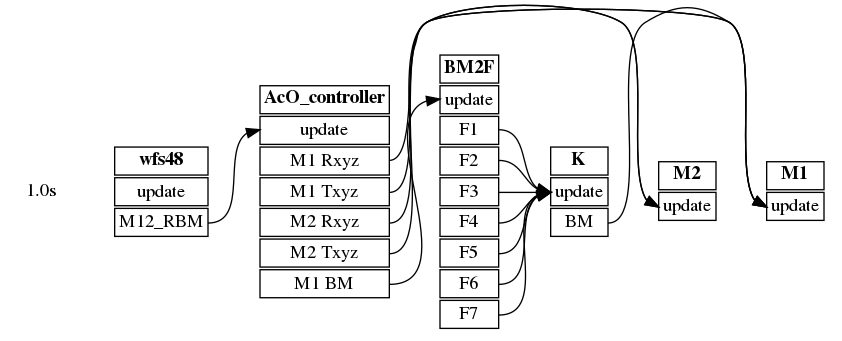

In [2]:
sim = dos.DOS(path, 20, show_timing = 2)
Image(filename=path + '/timing.png')

In [3]:
sim.start()

INFO:DOS:Pushing configuration to server


In [4]:
sim.join()
sim.terminate()

logs = sim.logs.entries

INFO:M1:GMT
INFO:M2:GMT
INFO:wfs48:OP0
INFO:DOS:Initializing
INFO:M1:None
INFO:M2:None
INFO:wfs48:None
INFO:DOS:Running
INFO:DOS:Terminating
INFO:M1:GMT deleted!
INFO:M2:GMT deleted!
INFO:wfs48:OpticalPath deleted!
INFO:DOS:Terminating


Elapsed time: 26.796630144119263


In [5]:
import matplotlib.pyplot as plt
try:
    from jupyterthemes import jtplot
    jtplot.style()
except:
    pass

import numpy as np
import matplotlib.pyplot as plt

try:
    duration = sim.cfg['simulation']['duration']
except NameError:
    duration = logs['wfs48']['M12_RBM'].timeSeries[0][-1]
    
xticks = np.arange(0, duration + 1, duration/ 10)

logs

{'wfs48': {'M12_RBM': <dos.dos.Entry at 0x7fe686566e50>},
 'AcO_controller': {'M1 Rxyz': <dos.dos.Entry at 0x7fe68634cd50>,
  'M1 Txyz': <dos.dos.Entry at 0x7fe68634cf10>,
  'M2 Rxyz': <dos.dos.Entry at 0x7fe6863a7f50>,
  'M2 Txyz': <dos.dos.Entry at 0x7fe6863be150>,
  'M1 BM': <dos.dos.Entry at 0x7fe6863be1d0>},
 'BM2F': {'F1': <dos.dos.Entry at 0x7fe6863be4d0>,
  'F2': <dos.dos.Entry at 0x7fe6863be3d0>,
  'F3': <dos.dos.Entry at 0x7fe6863be490>,
  'F4': <dos.dos.Entry at 0x7fe6863be690>,
  'F5': <dos.dos.Entry at 0x7fe6863be810>,
  'F6': <dos.dos.Entry at 0x7fe6863be910>,
  'F7': <dos.dos.Entry at 0x7fe6863bea10>},
 'K': {'BM': <dos.dos.Entry at 0x7fe6863bee10>}}

In [6]:
 logs['AcO_controller']['M1 Txyz']

In [7]:
logs['AcO_controller']['M1 BM'].timeSeries[1].shape

(7, 27, 101)

Aco shape Txyz: (7, 3, 101)


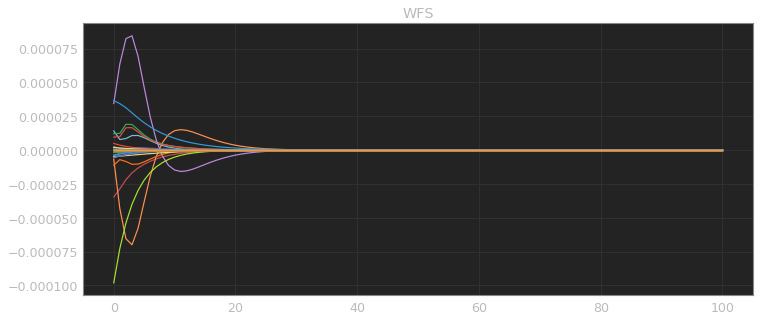

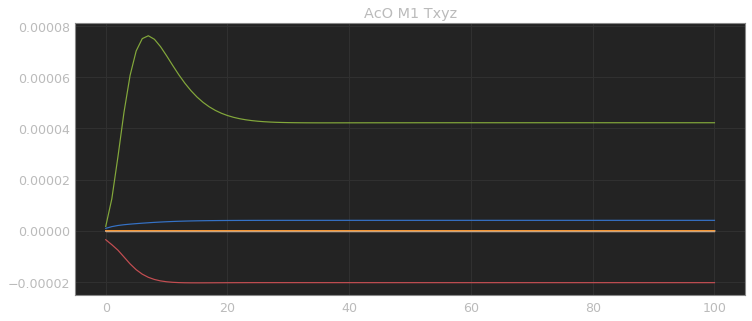

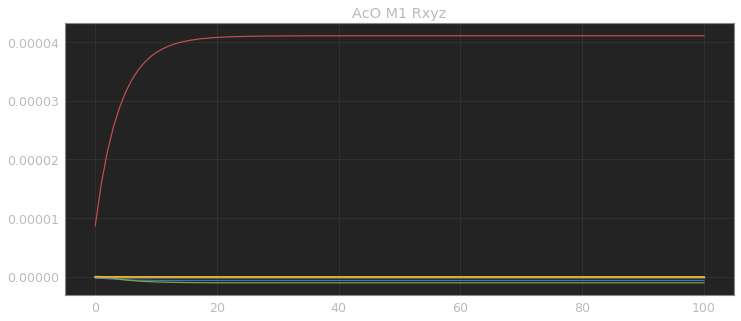

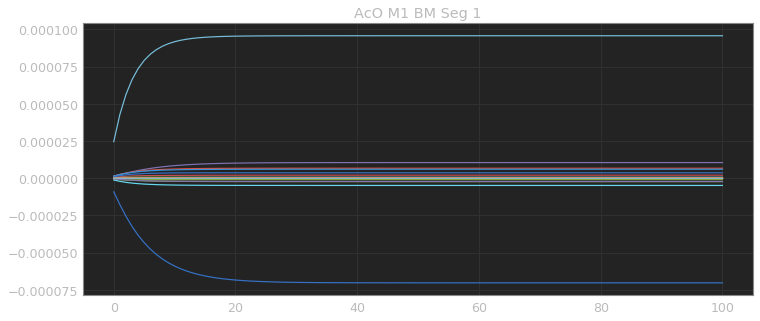

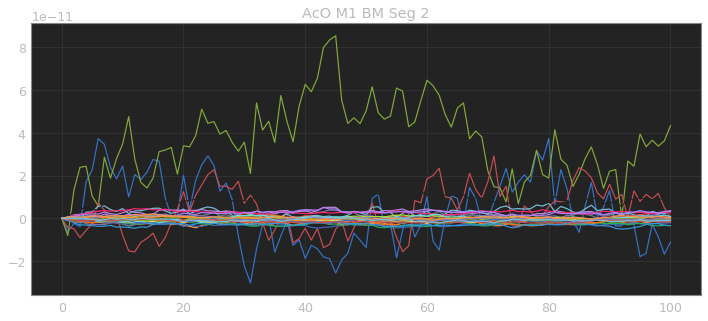

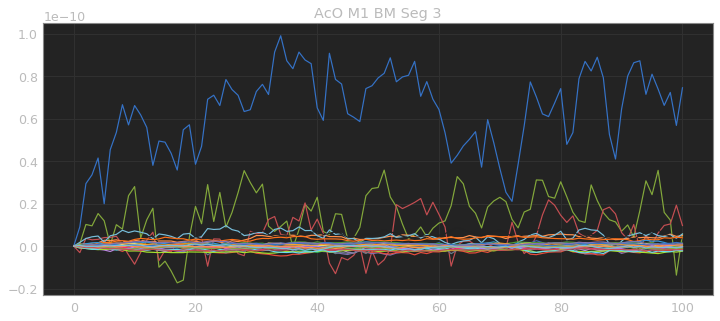

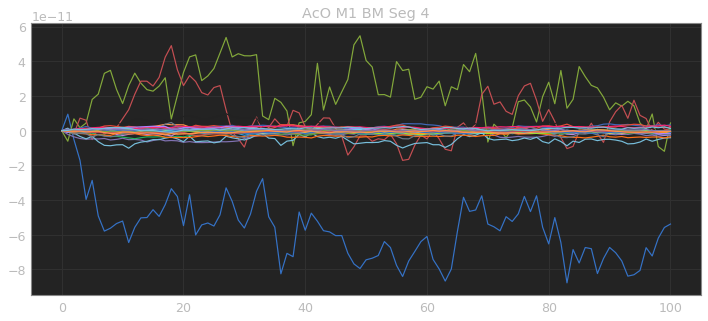

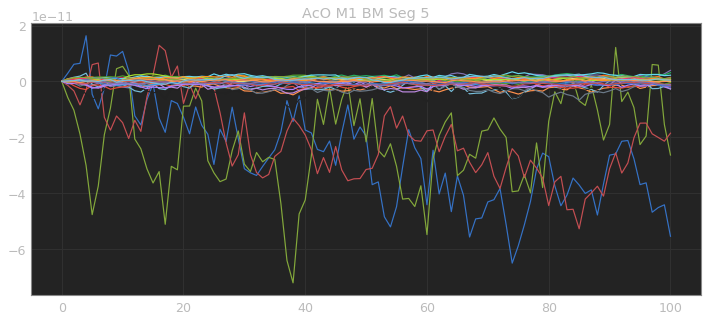

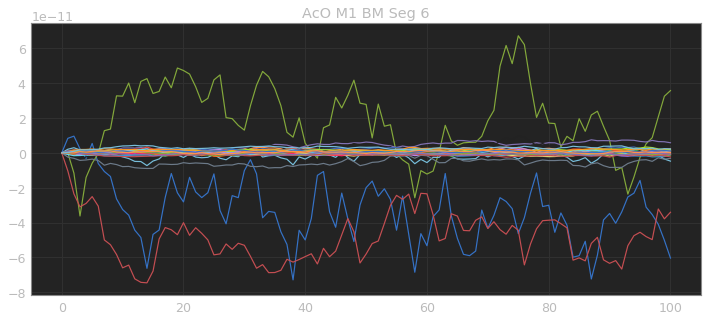

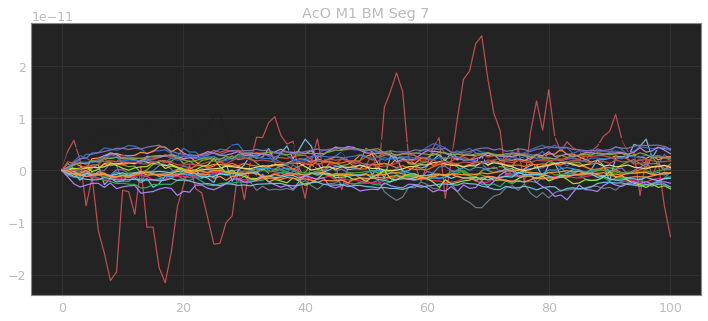

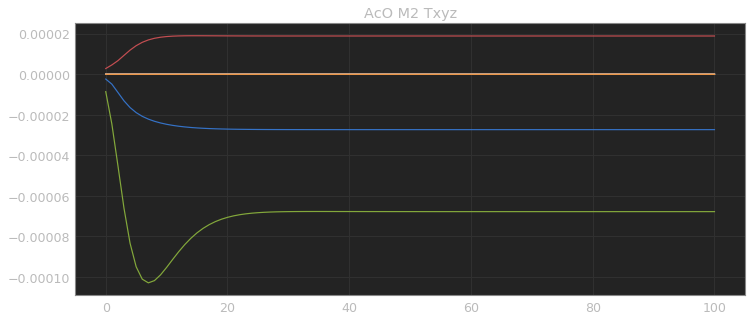

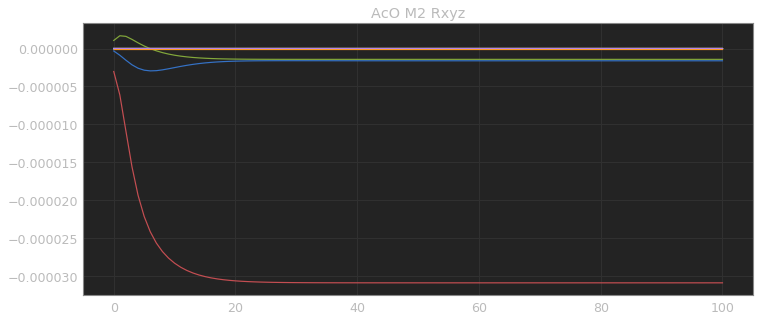

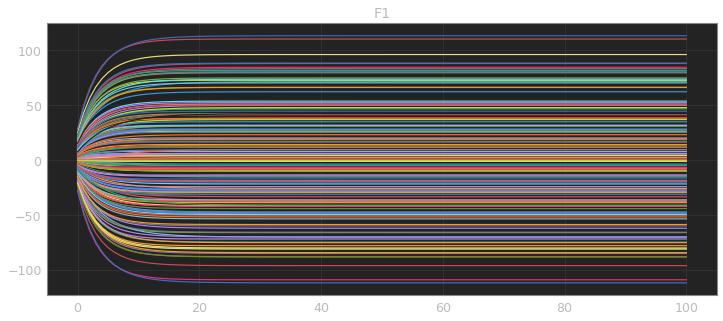

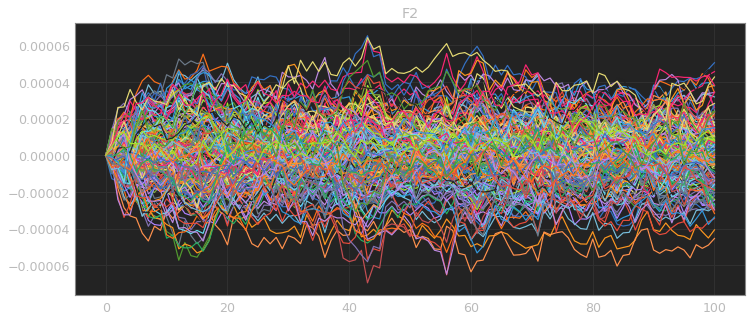

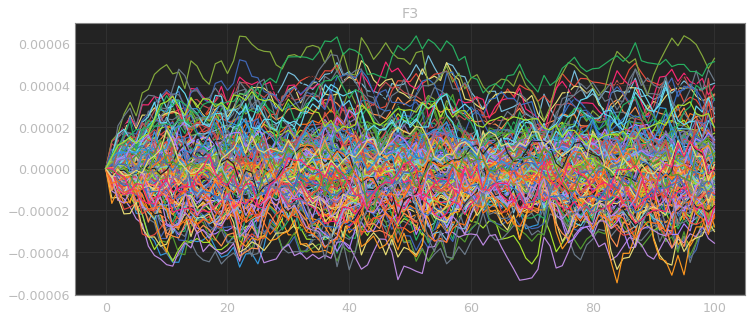

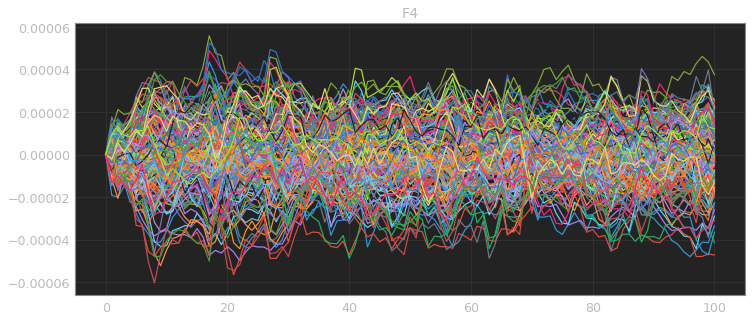

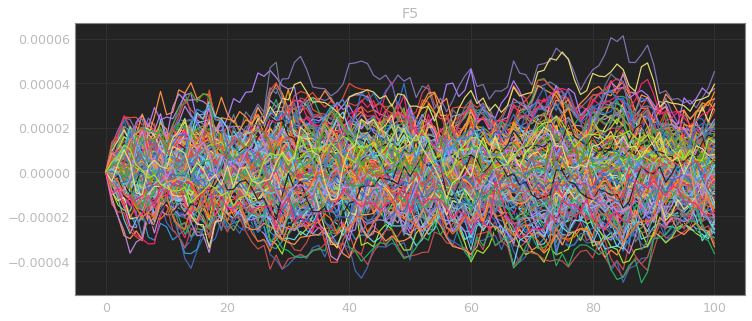

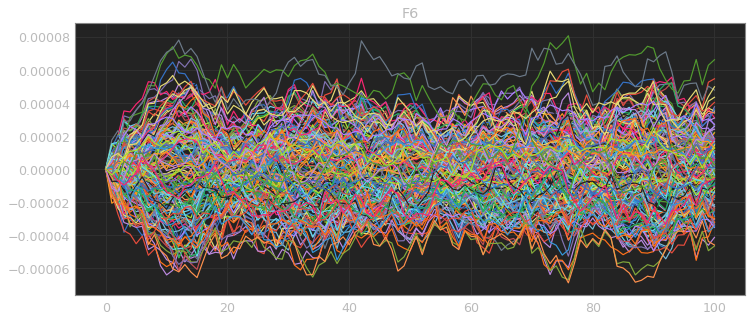

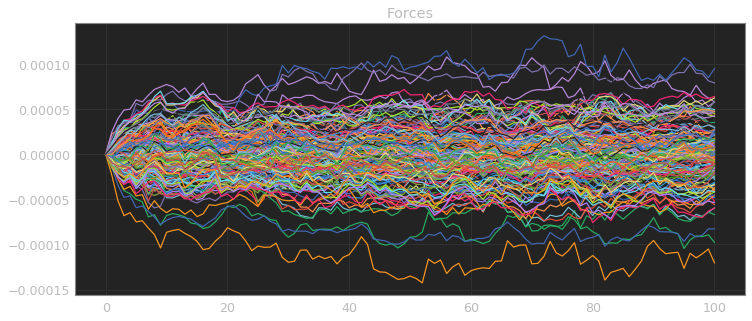

In [8]:
print('Aco shape Txyz:', logs['AcO_controller']['M1 Txyz'].timeSeries[1].shape)
    #,'\nAco shape Rxyz:', logs['AcO_controller']['M1 Rxyz'].timeSeries[1].shape
    #,'\nwfs shape:', logs['wfs48']['M12_RBM'].timeSeries[1].shape)

size = (12,5)
plt.figure(figsize = size)
plt.plot(logs['wfs48']['M12_RBM'].timeSeries[1][:,:])
plt.title('WFS')
plt.show()

plt.figure(figsize = size)
xlim = [0,1]
lim = 1e-5
ylim = [-lim, lim]
for i in range (7):
    plt.plot(logs['AcO_controller']['M1 Txyz'].timeSeries[1][i,:,:].T)
plt.title('AcO M1 Txyz')

plt.figure(figsize = size)
for i in range (7):
    plt.plot(logs['AcO_controller']['M1 Rxyz'].timeSeries[1][i,:,:].T)
plt.title('AcO M1 Rxyz')


for i in range (7):
    plt.figure(figsize = size)
    plt.plot(logs['AcO_controller']['M1 BM'].timeSeries[1][i,:,:].T)
    plt.title('AcO M1 BM Seg ' + str(i+1) )

plt.figure(figsize = size)
for i in range (7):
    plt.plot(logs['AcO_controller']['M2 Txyz'].timeSeries[1][i,:,:].T)
plt.title('AcO M2 Txyz')

plt.figure(figsize = size)
for i in range (7):
    plt.plot(logs['AcO_controller']['M2 Rxyz'].timeSeries[1][i,:,:].T)
plt.title('AcO M2 Rxyz')

for i in range (7):
    plt.figure(figsize = size)
    plt.plot(logs['BM2F']['F' + str(i+1)].timeSeries[1][:,:])
    plt.title('F' + str(i+1))
plt.title('Forces')

#plt.xlim(xlim)
#plt.ylim(ylim)
plt.show()


In [9]:
logs['K']['BM'].timeSeries[1].shape

(7, 154, 101)

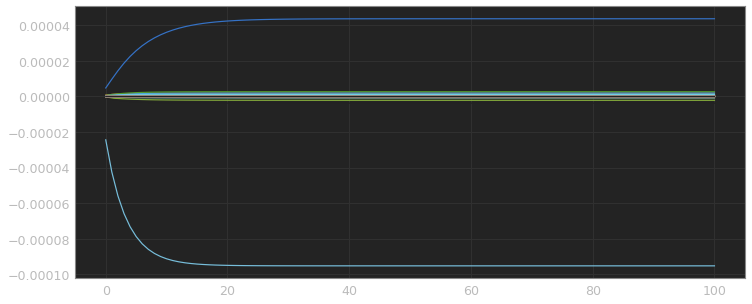

In [10]:
plt.figure(figsize = size)
plt.plot(logs['K']['BM'].timeSeries[1][0,:,:].T)
plt.show()